In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
train_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/train.csv')
test_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/test.csv')

Data science is not a linear process. In this project, in particular, you will likely find that EDA, data cleaning, and exploratory visualizations will constantly feed back into each other. Here's an example:

- During basic EDA, you identify many missing values in a column/feature.  
- You consult the data dictionary and use domain knowledge to decide what is meant by this missing feature.  
- You impute a reasonable value for the missing value.  
- You plot the distribution of your feature.  
- You realize what you imputed has negatively impacted your data quality.  
- You cycle back, re-load your clean data, re-think your approach, and find a better solution.  

In [7]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## MS SubClass:

In [10]:
# MS SubClass
mssc_dummies = train_df[['Id','MS SubClass']]
ms_new = pd.get_dummies(columns=['MS SubClass'], data=mssc_dummies, drop_first=True)

In [11]:
ms_new

,Id,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,109,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,544,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,318,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2047,785,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2048,916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2049,639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
X = ms_new[['MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180','MS SubClass_190']]
y = train_df['SalePrice']

In [15]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef

In [16]:
y_pred, y_intercept, y_coef = slr_model(X, y)

In [19]:
metrics.mean_squared_error(y, y_pred, squared=False)

68317.74141069653

## MS Zoning

In [27]:
# MS Zoning
msz_dummies = train_df[['Id','MS Zoning']]
msz_new = pd.get_dummies(columns=['MS Zoning'], data=msz_dummies, drop_first=True)

In [29]:
msz_new.head(1)

,Id,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM
0,109,0,0,0,0,1,0


In [31]:
X = msz_new[['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM']]
y = train_df['SalePrice']

In [32]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef

In [33]:
y_pred, y_intercept, y_coef = slr_model(X, y)

In [34]:
metrics.mean_squared_error(y, y_pred, squared=False)

74718.9436958434

## Lot Frontage

In [42]:
dropped_na = train_df.drop(train_df[train_df['Lot Frontage'].isna()].index)

In [43]:
dropped_na.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000


In [47]:
# Lot Frontage
dropped_na.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [55]:
X = dropped_na[['Lot Frontage']]
y = dropped_na['SalePrice']

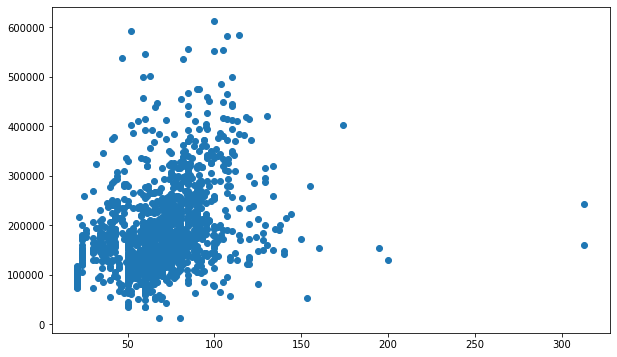

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_na['Lot Frontage'], dropped_na['SalePrice']);

In [74]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
metrics.mean_squared_error(y, y_pred, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [2049, 1721]

In [57]:
y_pred, y_intercept, y_coef = slr_model(X, y)

In [84]:
metrics.mean_squared_error(y, y_pred, squared=False)

74501.74563041469

## Lot Area

In [63]:
train_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [66]:
train_df[train_df['Lot Area'] > 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


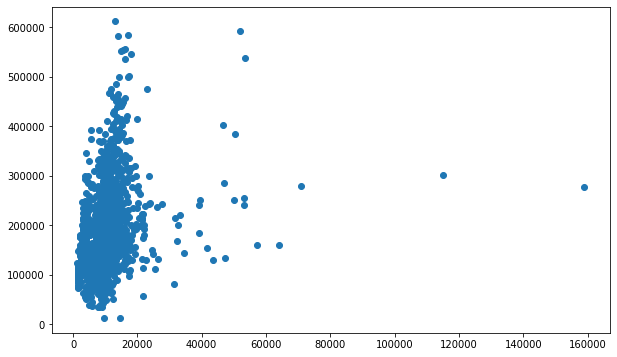

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Lot Area'], train_df['SalePrice']);

In [68]:
dropped_area = train_df.drop(train_df[train_df['Lot Area'] > 100000].index)

In [72]:
dropped_area.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


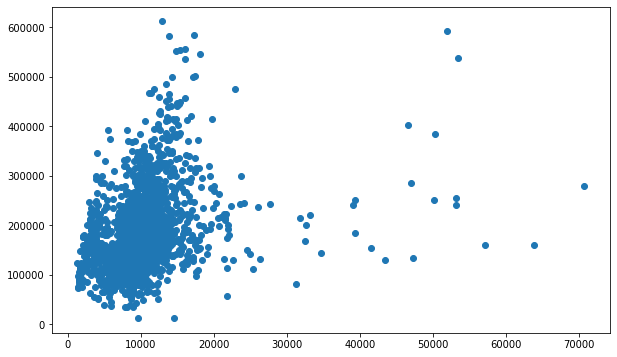

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_area['Lot Area'], dropped_area['SalePrice']);

In [77]:
X = dropped_area[['Lot Area']]
y = dropped_area['SalePrice']

In [85]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 74501.74563041469'

## Street

In [86]:
street_dummies = train_df[['Id','Street']]
street_new = pd.get_dummies(columns=['Street'], data=street_dummies, drop_first=True)

In [92]:
street_new.head(1)

,Id,Street_Pave
0,109,1


In [94]:
X = street_new[['Street_Pave']]
y = train_df['SalePrice']

In [95]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 79045.84089947173'

## Alley 

In [106]:
train_df['Alley'].isna().sum()

1911

There are to many na values so disregard

## Lot Shape

In [109]:
train_df['Lot Shape'].isna().sum()

0

In [112]:
train_df['Lot Shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [113]:
lot_dummies = train_df[['Id','Lot Shape']]
street_new = pd.get_dummies(columns=['Lot Shape'], data=lot_dummies, drop_first=True)

In [115]:
street_new.head(1)

,Id,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,109,0,0,0


In [117]:
X = street_new[['Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg']]
y = train_df['SalePrice']

In [118]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 75338.57111167454'

## Land Contour

In [121]:
train_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [123]:
train_df['Land Contour'].unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [127]:
train_df['Land Contour'].isna().sum()

0

In [128]:
land_dummies = train_df[['Id','Land Contour']]
land_new = pd.get_dummies(columns=['Land Contour'], data=land_dummies, drop_first=True)

In [131]:
land_new.head(1)

,Id,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl
0,109,0,0,1


In [139]:
X = land_new[['Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl']]
y = train_df['SalePrice']

In [140]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 77054.93007375672'

In [25]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['Overall Qual'], train_df['SalePrice']);

In [30]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['BsmtFin SF 1'], train_df['SalePrice']);